# <u>ICE Video Game Forecast for year 2017</u>

## <u>Table of contents</u>
1. [Preface](#preface)
2. [Initialization](#initialize)
3. [Data Preprocessing](#dp)
    * 3.1 [Initial Preparation](#dp1)
    * 3.2 [Column - 'name'](#dp2)
    * 3.3 [Column - 'platform'](#dp3)
    * 3.4 [Column - 'year'](#dp4)
    * 3.5 [Column - 'genre'](#dp5)
    * 3.6 [Column(s) - Sales Data](#dp6)
    * 3.7 [Column(s) - Score Data](#dp7)
    * 3.8 [Column - 'rating'](#dp8)
4. [Features Engineering](#fe)
5. [Historical Analysis](#ha)
    * 5.1 [Determining Period of Study](#ha1)
    * 5.2 [Analyzing Profitable Platforms](#ha2)
    * 5.3 [PS4 | Correlation Between Critic/User Scores and Total Sales](#ha3)
    * 5.4 [Comparing popular Cross-Platform games](#ha4)
    * 5.5 [Analyzing Profitable Genres](#ha5)
6. [User Profiles](#up)
    * 5.1 [Top 5 Platforms by Region Sales](#up1)
    * 5.2 [Top 5 Genres by Region Sales](#up2)
    * 5.3 [Correlation between ESRB Rating and Region Sales](#up3)
7. [Hypothesis Testing](#ht)
    * 7.1 [Average user scores of the Xbox One and PC platforms are Similar](#ht1)
    * 7.2 [Average user scores for the Action and Sports genres are Different ](#ht2)
8. [Conclusions](#c)  

# 1. <u>Preface</u> <a id="preface"></a>

As a global online video game store, our foremost aim for our 2017 forecast is to determine which platforms are revenue generating machines and which game genres are preferred by regional populations. We want these to be our focus when constructing marketing campaign target markets for our main regions of e-commerce. As we have sales data going as far back as the 80s, this will allow us to use historical trends to determine potential winners and (hopefully) gain market share throughout the year in all possible regions. 


**Potential Steps to Analysis:**

1. Slice our data to a manageable level and one that encapsulates a period of years that is relevant to today's games.
2. Analyze and compare profitable platforms of current and prior generations of consoles. As we do not have complete data for this year, this will allow us to spot trends for platforms that are bound to generate sales in the proceeding year, at the same time platforms that are on the downtrend. 
3. Analyze relationship between critic & user scores, and their influence on buyer's behaviour. Which of the two holds more weight/merit?
4. Analyze profitable genres for our entire population over the specified time period.
5. Observe data from the most recent 2 years and obtain the best performing platforms and genres for each major region of NA, EU and JP.
6. Study relationship between ESRB Rating and sales figures for each major region of NA, EU and JP.
7. Some general hypothesis testing to confirm observations and assumptions.

# 2. <u>Initialization</u> <a id="initialize"> </a>

In [1]:
# Loading necessary libraries:

import pandas as pd
import numpy as np
import math as mt
import scipy.stats as st
import matplotlib.pyplot as plt 

In [2]:
# Loading and converting CSV files to DataFrames:

try: 
    df = pd.read_csv('games.csv')
    
except: 
    df = pd.read_csv('/datasets/games.csv')

In [3]:
# General overview of our columns:

display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Starting off by standardizing all column names to the lower case:

df.columns = map(str.lower, df.columns)

In [5]:
# Checking our column name fix and getting a general overview of all our data:

display(df.head())
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Getting statistical overview:

df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**List of Obvious Problems and Potential Fixes:**
<br>
1. *'name'* column contains missing values and should be standardized to the lower case.
2. *'platform'* column should be standardized to the lower case.
3. *'year_of_release'* column contains missing values. It's data type also needs to the INT type, while its column name will be replaced with 'year'.
4. *'genre'* categorical column contains missing values and should be standardized to the lower case.
5. Sales data have exceedingly high amounts of 0.00 values. We need to investigate if these are indeed missing values, or whether they have are specific to different regions.
6. *'critic_score'* column contains missing values.
7. *'user_score'* column contains missing values. Its data type also needs to be converted to the FLOAT type after missing value treatment.
8. *'rating'* column contains missing values.

# 3. <u>Data Preprocessing</u> <a id="dp"> </a>

## 3.1. Initial Preparation <a id="dp1"> </a>
**Screening for Noise.**
<br>
As we we are all well aware of the most used and beloved gaming platforms around the world, there are also those that are contrary to the former. These platforms are either very old, very niche or just platforms that did not gain any traction with consumers around the world. Either ways, they would represent an extremely small sample size compared to our overall population.

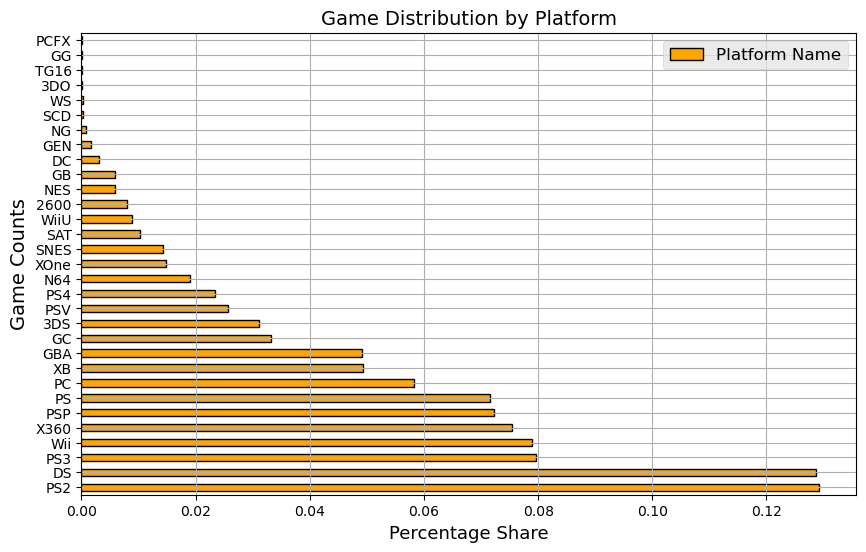

In [7]:
# Finding platforms of extremely small sample size:

(df.platform
 .value_counts(normalize=True)
 .plot(kind='barh', grid=True, edgecolor='black', color='orange', figsize=(10,6))
)

plt.style.use('ggplot')
plt.title('Game Distribution by Platform', fontsize=14)
plt.legend(['Platform Name'], loc='upper right', prop={'size': 12})
plt.ylabel('Game Counts', fontsize=14)
plt.xlabel('Percentage Share', fontsize=13)
plt.xticks(rotation=360)

plt.show()

In [8]:
# Getting the percentage share of our almost null share platforms:

(
    len(df.query("platform == ['PCFX', 'GG', 'TG16', '3DO', 'WS', 'SCD']")) 
    / 
    len(df)
    * 100
)

0.11367035596769369

**Observations:**
<br>
>The platforms 'PCFX', 'GG', 'TG16', '3DO', 'WS', 'SCD' are almost indiscerninable on our bar chart and altogether represent a negligible 0.11% share. We shall drop these entries as they possess close to null predictive value.

In [9]:
# Dropping entries of platforms == 'PCFX', 'GG', 'TG16', '3DO', 'WS', 'SCD':

df = df.drop(df.query("platform == ['PCFX', 'GG', 'TG16', '3DO', 'WS', 'SCD']").index)
df.reset_index(drop=True, inplace=True)

## 3.2. Column - 'name' <a id="dp2"> </a>

In [10]:
# Checking the nature of our 'name' missing values:

df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14229,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Observation:**
<br>
>We cannot conclusively infer any connection between our missing 'name' values and other categorical columns as we are missing 'genre' values as well. Our non-null columns of 'platform' and 'year_of_release' are essentially bins of multiple games and it would be wrong to assume that games belonging to these platforms and release years respectively are correlated to our missing names. Also missing are score and rating values, so we can't exactly research them on the internet either. Hence, we will drop these 2 entries.

In [11]:
# Dropping entries 659 and 14229:

df = df.drop(df.query("name.isna()").index)

df.reset_index(drop=True, inplace=True)

In [12]:
# Fix check:

df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
# Converting values to lower case:

df['name'] = df['name'].str.lower()

In [14]:
# Checking overall info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16694 entries, 0 to 16693
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16694 non-null  object 
 1   platform         16694 non-null  object 
 2   year_of_release  16425 non-null  float64
 3   genre            16694 non-null  object 
 4   na_sales         16694 non-null  float64
 5   eu_sales         16694 non-null  float64
 6   jp_sales         16694 non-null  float64
 7   other_sales      16694 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 3.3. Column - 'platform' <a id="dp3"> </a>

In [15]:
# Converting all 'platform' values to lower case:

df['platform'] = df['platform'].str.lower()

In [16]:
# Fix check:

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [17]:
# Replacing 'platform' == 'ps' to 'ps1':

df['platform'] = df['platform'].replace('ps', 'ps1')

## 3.4. Column - 'year' <a id="dp4"> </a>

In [18]:
df = df.rename(columns={'year_of_release': 'year'})

In [19]:
# Investigating entries with missing values:

df[df.year.isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16352,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16384,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16427,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16437,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
# Checking if some of these games were released on different platforms:

display(df[df['name'].str.contains("madden nfl 2004")].head())
display(df[df['name'].str.contains("lego batman: the videogame")].head())
display(df[df['name'].str.contains("virtua quest")].head())
df[df['name'].str.contains("pdc world championship darts 2008")].head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1879,madden nfl 2004,xb,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3887,madden nfl 2004,gc,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5705,madden nfl 2004,gba,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,x360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,ds,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1517,lego batman: the videogame,ps3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1536,lego batman: the videogame,psp,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15733,virtua quest,ps2,NaN,Role-Playing,0.01,0.01,0.0,0.0,53.0,7.6,T
16501,virtua quest,gc,NaN,Role-Playing,0.01,0.00,0.0,0.0,55.0,5.5,T


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6912,pdc world championship darts 2008,wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15932,pdc world championship darts 2008,ds,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16352,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+


**Observation:**
<br>
>It appears most of our games were released on different platforms throughout our data. However, there are 1 or potentially more games that had absolutely no release year value. For the former, we will fill in missing values the mean of their respective names. For the latter games with completely null release year values, we could fill them in manually; however, some of them have incomplete sales data and critic/user scores, both of which we will be unable to retrieve for now, thus the better option would be to drop them altogether.

In [21]:
# Replacing missing values with the 'year_of_release' mean of that particular entry's name:

df['year'] = df.groupby('name')['year'].transform(lambda x: x.fillna(x.mean()))

In [22]:
# Calculating share of remaining missing release-year values: 

(df['year'].isna()).mean()

0.008745657122319396

In [23]:
# Dropping entries of missing 'year_of_release' values:

df = df.drop(df.query("year.isna()").index)
df.reset_index(drop=True, inplace=True)

In [24]:
# Converting 'year_of_release' to the Int type:

df['year'] = df['year'].astype(int)

In [25]:
# Fix check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16548 entries, 0 to 16547
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16548 non-null  object 
 1   platform      16548 non-null  object 
 2   year          16548 non-null  int32  
 3   genre         16548 non-null  object 
 4   na_sales      16548 non-null  float64
 5   eu_sales      16548 non-null  float64
 6   jp_sales      16548 non-null  float64
 7   other_sales   16548 non-null  float64
 8   critic_score  8075 non-null   float64
 9   user_score    9934 non-null   object 
 10  rating        9868 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


## 3.5. Column - 'genre' <a id="dp5"> </a>

In [26]:
# Converting the 'genre' column to lower-case:

df['genre'] = df['genre'].str.lower()

In [27]:
# Finding our previously observed missing values:

df.query("genre.isna()")

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [28]:
# Checking 'genre' value counts:

df.genre.value_counts()

action          3342
sports          2333
misc            1733
role-playing    1478
shooter         1310
adventure       1292
racing          1235
platform         877
simulation       859
fighting         842
strategy         675
puzzle           572
Name: genre, dtype: int64

**Observations:**
<br>
>It appears our 'genre' missing values were inadvertantly removed simultaneously during missing value treatment on prior columns. We also found an error that is slightly pedantic in nature, in that the 'role-playing' genre is generally termed 'rpg' in the gaming community and as such, we will rename it.

In [29]:
# Replacing 'role_playing' value with 'rpg' as the latter term is more synonymous with what the gaming community is used to:

df['genre'] = df['genre'].replace('role-playing', 'rpg')

## 3.6. Column(s) - Sales Data <a id="dp6"> </a>

In [30]:
# Total 0 values in all sales columns:

display(df.query("na_sales == 0")['year'].count())
display(df.query("eu_sales == 0")['year'].count())
display(df.query("jp_sales == 0")['year'].count())
df.query("other_sales == 0")['year'].count()

4450

5782

10407

6509

In [31]:
# Entries whereby na_sales == 0:

df.query("na_sales == 0")

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,monster hunter freedom 3,psp,2010,rpg,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,friend collection,ds,2009,misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,monster hunter 4,3ds,2013,rpg,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,english training: have fun improving your skills!,ds,2006,misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,dragon quest vi: maboroshi no daichi,snes,1995,rpg,0.0,0.00,3.19,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16542,score international baja 1000: the official game,ps2,2008,racing,0.0,0.00,0.00,0.00,NaN,NaN,NaN
16543,samurai warriors: sanada maru,ps3,2016,action,0.0,0.00,0.01,0.00,NaN,NaN,NaN
16544,lma manager 2007,x360,2006,sports,0.0,0.01,0.00,0.00,NaN,NaN,NaN
16545,haitaka no psychedelica,psv,2016,adventure,0.0,0.00,0.01,0.00,NaN,NaN,NaN


In [32]:
# Taking a sample of our DataFrame (all Monster Hunter games) to investigate the nature of our 0 values:

df.query("name.str.contains('monster hunter')").sort_values('year', ascending=True)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3965,monster hunter,ps2,2004,rpg,0.11,0.08,0.28,0.03,68.0,8.9,T
1449,monster hunter freedom,psp,2005,rpg,0.24,0.03,1.03,0.04,71.0,8.6,T
6929,monster hunter g,ps2,2005,rpg,0.00,0.00,0.23,0.00,NaN,NaN,NaN
597,monster hunter freedom 2,psp,2007,rpg,0.37,0.27,1.75,0.18,72.0,8.7,T
163,monster hunter freedom unite,psp,2008,rpg,0.47,0.55,4.13,0.34,81.0,8.7,T
725,monster hunter tri,wii,2009,rpg,0.65,0.40,1.05,0.11,84.0,8.6,T
6678,monster hunter g,wii,2009,rpg,0.00,0.00,0.25,0.00,NaN,NaN,NaN
215,monster hunter freedom 3,psp,2010,rpg,0.00,0.00,4.87,0.00,NaN,NaN,NaN
13892,monster hunter frontier online: season 9.0,x360,2010,rpg,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13193,monster hunter frontier online,ps3,2010,rpg,0.00,0.00,0.05,0.00,NaN,NaN,NaN


**Observation:** 
<br>
>There is a trend with our 0 sales values, in that for every game with an observed 0 value in its 'na_sales' column, 0 values are also observed in 'eu_sales' and 'other_sales', while sales data is present in 'jp_sales'. In contrast, for games that contain sales data in any one of its sales column that is not 'jp_sales', we observe complete sales data for all its sales columns.

In [33]:
# Percentage share of Japan only releases for our sample game:

(
    len(df.query("name.str.contains('monster hunter') and na_sales == 0 and eu_sales == 0 and other_sales == 0"))
 / len(df.query("name.str.contains('monster hunter')"))
)


0.5909090909090909

In [34]:
# Getting another game franchise of non-Japanese origins as a sample:

df.query("na_sales != 0 and eu_sales != 0 and jp_sales == 0 and other_sales == 0")

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
138,world of warcraft,pc,2004,rpg,0.08,6.21,0.0,0.0,93.0,7.3,T
288,world of warcraft: the burning crusade,pc,2007,rpg,2.57,1.52,0.0,0.0,91.0,7.9,T
520,myst,pc,1994,adventure,0.02,2.79,0.0,0.0,NaN,NaN,NaN
654,theme hospital,pc,1997,strategy,2.30,0.10,0.0,0.0,NaN,9,K-A
796,world of warcraft: cataclysm,pc,2010,rpg,1.77,0.32,0.0,0.0,90.0,5.6,T
...,...,...,...,...,...,...,...,...,...,...,...
15990,alfa romeo racing italiano,ps2,2005,racing,0.01,0.01,0.0,0.0,NaN,6.8,E
16037,lifesigns: surgical unit,ds,2005,simulation,0.01,0.01,0.0,0.0,61.0,7.8,T
16073,vanark,ps1,1999,shooter,0.01,0.01,0.0,0.0,NaN,NaN,NaN
16091,bratz: forever diamondz,ps2,2006,adventure,0.01,0.01,0.0,0.0,NaN,tbd,E


In [35]:
# Using World of Warcraft as our sample of a non-Japanese-made game:

df.query("name.str.contains('world of warcraft')").sort_values('year', ascending=True)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
138,world of warcraft,pc,2004,rpg,0.08,6.21,0.0,0.00,93.0,7.3,T
288,world of warcraft: the burning crusade,pc,2007,rpg,2.57,1.52,0.0,0.00,91.0,7.9,T
1473,world of warcraft: wrath of the lich king,pc,2008,rpg,0.01,0.13,0.0,1.18,91.0,7.5,T
796,world of warcraft: cataclysm,pc,2010,rpg,1.77,0.32,0.0,0.00,90.0,5.6,T
954,world of warcraft: mists of pandaria,pc,2012,rpg,0.84,0.76,0.0,0.22,82.0,4.8,T
4124,world of warcraft: warlords of draenor,pc,2014,action,0.08,0.36,0.0,0.03,87.0,5.9,T
5570,world of warcraft: legion,pc,2016,rpg,0.13,0.16,0.0,0.03,88.0,7.5,T


**Observations:**
<br>
>Using the Japanese-made *Monster Hunter* franchise as a benchmark, a quick Google Search will highlight the fact that there were several iterations and versions of the game made in the past. Of all these games, approximately 2/3 were released to the Japanese community only. This roughly tallies with our percentage share of Japanese releases for Monster Hunter games in our dataset. We can use this inference to explain the 0 sales values in our other sales columns too, as conversely, there are games like World Of Warcraft with its various iterations (expansions) that has online multiplayer servers in most continents and its countries except for Japan. 
<br>***We can conclusively say that the right approach would be to keep our sales values as it is because they are valid. We do however want to exclude entries with completely missing sales data.***

In [36]:
# Looking for game entries that contain null data for all 4 Sales columns:

df.query("na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0")

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16509,g1 jockey 4 2008,ps3,2008,sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16542,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


**Observations:** 
<br>
>We found 2 entries that have complete no sales records, and it appears they contain no critic nor user scores either. We will drop these as they are negligable in size. 

In [37]:
# Dropping entries that contain complete null sales records:

df = df.drop(df.query("na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0").index)
df.reset_index(drop=True, inplace=True)

In [38]:
# Fix check:

len(df.query("na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0"))

0

In [39]:
# Checking our entries count:

df.shape

(16546, 11)

## 3.7. Column(s) - Score Data  <a id="dp7"> </a>

In [40]:
# Investigating missing 'critic_score' entries:

display(df.query("critic_score.isna()"))
df.critic_score.value_counts()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,rpg,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16541,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16542,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16543,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16544,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


70.0    253
71.0    252
75.0    243
78.0    238
73.0    236
       ... 
29.0      3
20.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

In [41]:
# Investigating missing 'user_score' entries:

display(df.query("user_score.isna()"))
df.user_score.value_counts()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,rpg,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16541,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16542,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16543,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16544,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

**Observations:** 
<br>
>The 'user_score' column was initially found as an Object type as it contains scores of 'tbd'. What we can assume from the term 'tbd' is that scores have yet to be tabulated and as such, is considered to be missing values until proven otherwise. We will replace these with NaN.

In [42]:
# Replacing 'tbd' with NaN

df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [43]:
# Fix check:

df.user_score.value_counts().head()

7.8    324
8.0    288
8.2    279
8.3    253
8.5    252
Name: user_score, dtype: int64

In [44]:
# Getting a sample of an observed game that contains missing values in both 'critic_score' and 'user_score':

df.query("name.str.contains('super mario bros.')").sort_values('year', ascending=True)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
573,super mario bros.: the lost levels,nes,1986,platform,0.00,0.00,2.65,0.00,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
98,super mario bros. 2,nes,1988,platform,5.39,1.18,0.70,0.19,NaN,NaN,NaN
201,super mario bros.,gb,1999,platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN
187,super mario bros. 3,gba,2003,platform,2.93,1.25,0.83,0.20,NaN,NaN,NaN
1334,classic nes series: super mario bros.,gba,2004,platform,0.00,0.00,1.39,0.03,84.0,8.6,E
4539,famicom mini: super mario bros. 2,gba,2004,platform,0.00,0.00,0.41,0.01,NaN,NaN,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E


**Observations:**
<br>
>We sorted games in the Super Mario Bros. franchise by their release year. Our oldest games depicted a consistent trend of missing values across scores and also rating. We could have attributed these entries as being too old, so much so that any kind of rating and scoring system would not have been around at the time. 
<br><br>However, we also found a couple of entries with complete missing values for both score columns in the upper end of the table. We don't think these entries were because of user error though, as their overall sales figures pale in comparison to the rest of our entries. A potential explanation for this would be that they represent spin-offs that deviated from the franchise's norm and hence did not garner much interest from its community OR that the games were so new that they had not yet captured enough user reviews.

In [45]:
# Getting total entries with either 'critic_score' or 'user_score' missing:

display(len(df.query("critic_score.isna() and user_score.notna()")))
len(df.query("critic_score.notna() and user_score.isna()"))

571

1106

**Observations and Proceeding Steps:**
<br>
> It appears we also have entries whereby either critic scores or user scores were missing. Some games might have been released so recently that even if there was a professionally written review done about them, user scores might not have time to have  gathered traction, or the converse might be true for some games that aren't that popular, so much so it might not have been worthwhile for a professional review to be written about them. Either ways it wouldn't be wise to drop them as they still contain substantial sales data, nor would it be prudent to replace them with {0} as the aforementioned score is a valid one, albeit not seen very often.
<br>
<br>
***Moving forward, we'd like to replace our missing values with {-99/-9}, as {0} is a valid score and a quite possible scnerario.***  

In [46]:
# Getting a baseline for our total missing values in the score columns:

display(len(df.query("critic_score.isna()")))
len(df.query("user_score.isna()"))

8471

9006

In [47]:
# Replacing missing vals in critic_score with -99 and user_score with -9

df['critic_score'].fillna(-99, inplace=True)
df['user_score'].fillna(-9, inplace=True)

In [48]:
# Fix check:

display(len(df.query("critic_score.isna()")))
len(df.query("user_score.isna()"))

0

0

In [49]:
# Converting our user scores to a factor of 100 for ease of comparison later on:

df.user_score = df.user_score * 10

In [50]:
# Fix check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16546 entries, 0 to 16545
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16546 non-null  object 
 1   platform      16546 non-null  object 
 2   year          16546 non-null  int32  
 3   genre         16546 non-null  object 
 4   na_sales      16546 non-null  float64
 5   eu_sales      16546 non-null  float64
 6   jp_sales      16546 non-null  float64
 7   other_sales   16546 non-null  float64
 8   critic_score  16546 non-null  float64
 9   user_score    16546 non-null  float64
 10  rating        9868 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


## 3.8. Column - 'rating'  <a id="dp8"> </a>

In [51]:
# Getting unique categories from our ESRB 'rating' column:

df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**N/B: The ESRB Rating system was founded in late 1994.**

<u>ESRB Abbreviations<u/>
<br>
1. EC = Early Childhood
2. E = Everyone
3. E10+ = Everyone (age 10+)
4. T = Teen (age 13+)
5. M = Mature (age 17+)
6. AO = Adults Only (18+)
7. RP = Rating Pending
8. K-A = Kids-Adults, later renamed to Everyone (E)

**Observations:** 
<br>
>K-A is the old ESRB term for E. We will replace these entries with E.

In [52]:
# Checking our missing values:

df[df.rating.isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-99.0,-90.0,NaN
4,pokemon red/pokemon blue,gb,1996,rpg,11.27,8.89,10.22,1.00,-99.0,-90.0,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-99.0,-90.0,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-99.0,-90.0,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,-99.0,-90.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16541,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-99.0,-90.0,NaN
16542,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-99.0,-90.0,NaN
16543,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-99.0,-90.0,NaN
16544,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-99.0,-90.0,NaN


**Observations:** 
<br>
>As seen in our prior analysis, there are more than a few games with different iterations and versions. It is clear our missing values here were possibly caused by user error, as it doesn't make sense for different yearly iterations of the same game to have a mix of present and null rating values. Our missing value entries could possibly be games that are still awaiting a final ESRB rating or perhaps an error at the data collection/input stage. We will replace these values with the general 'RP' rating.

In [53]:
# Changing our K-A category to E:

df.rating = df.rating.replace('K-A', 'E')

In [54]:
# Filling 'rating' missing values with 'RP' IF..
## game was released after year-1994 (ESRB founding year)

df.loc[df['year'] > 1994, 'rating'] = df.loc[df['year'] > 1994, 'rating'].fillna('RP')

In [55]:
df.rating.value_counts()

RP      6207
E       3961
T       2930
M       1554
E10+    1412
EC         8
AO         1
Name: rating, dtype: int64

In [56]:
# Checking if there are any remaining missing values:

df.rating.isna().sum()

473

In [57]:
# Calculating percentage share of missing values:

df.rating.isna().mean()

0.02858696966034087

In [58]:
# Dropping entries with remaining missing values as they represent release years that are too far back to affect our forecast;
## They also only represent a 3% share of our data:

df = df.dropna(subset=['rating'])
df.reset_index(drop=True, inplace=True)

In [59]:
# Final check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16073 entries, 0 to 16072
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16073 non-null  object 
 1   platform      16073 non-null  object 
 2   year          16073 non-null  int32  
 3   genre         16073 non-null  object 
 4   na_sales      16073 non-null  float64
 5   eu_sales      16073 non-null  float64
 6   jp_sales      16073 non-null  float64
 7   other_sales   16073 non-null  float64
 8   critic_score  16073 non-null  float64
 9   user_score    16073 non-null  float64
 10  rating        16073 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


# 4. <u>Features Engineering</u> <a id="fe"> </a>

In [60]:
# Getting total sales figures for each game:

df.insert(loc=8, column='total_sales', value=df.na_sales + df.eu_sales + df.jp_sales + df.other_sales)

In [61]:
# Final check:

df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E
3,pokemon red/pokemon blue,gb,1996,rpg,11.27,8.89,10.22,1.00,31.38,-99.0,-90.0,RP
4,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,E


# 5. <u>Historical Analysis</u> <a id="ha"> </a>

## 5.1. Determining Period of Study<a id="ha1"> </a>

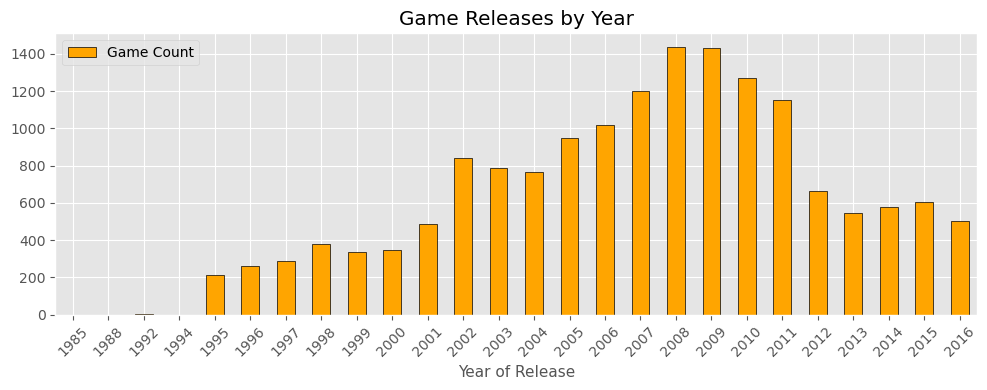

In [62]:
# Observing yearly distributions of games released:

(df
 .pivot_table(index='year', values='name', aggfunc='count')
 .plot(kind='bar', grid=True, edgecolor='black', color='orange', figsize=(10,4))
)

plt.title('Game Releases by Year')
plt.xlabel('Year of Release', fontsize=11)
plt.xticks(rotation=45)

plt.legend(['Game Count'], loc='upper left', prop={'size': 10})

plt.tight_layout()

**Observation:**
<br>
>The majority of our games were released approximately after the turn of the millenium (year 2000). This is inline with the fact that the age of Internet gave precedence to global connectivity, which in turn ushered in a whole host of new multiplayer online games and the distribution of digital copies of most games in the market. More game development companies were founded after the fact, due to ease of attaining crowdfunding and community feedback. That being said, the number of games released only really started picking up significantly after 2002, so from a general overview, roughly 2002 onwards would be our best representative sample size. 

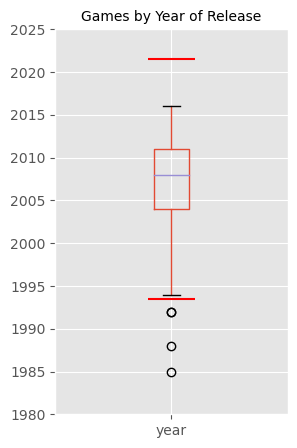

Lower limit for Substantial Share of Data: 2004.0


In [63]:
# Finding our Q1 threshold:

Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

df.boxplot(column=['year'], grid=True, figsize=(3,5))


plt.title('Games by Year of Release', fontsize=10)
plt.ylim(1980, 2025)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.show()
 
print("Lower limit for Substantial Share of Data:", Q1)


**Observations:**
<br>
>Our prior observations were roughly correct. The year of 2004 onwards is where most of our game releases started picking up from. ***We will hence use this as a benchmark when diving into the total sales of different platforms.***

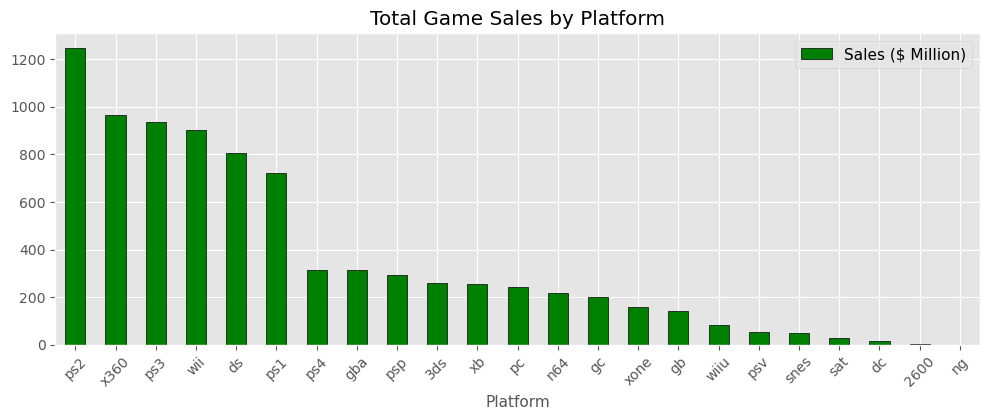

In [64]:
# Investigating Total Sales by each unique Platform:

(df
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', grid=True, edgecolor='black', color='green', figsize=(10,4.3))
)

plt.title('Total Game Sales by Platform')
plt.xlabel('Platform', fontsize=11)
plt.xticks(rotation=45)

plt.legend(['Sales ($ Million)'], loc='upper right', prop={'size': 11})

plt.tight_layout()

**Observations & Proceeding Steps:**
<br>
>Our highest sales figures belong to (1)Sony Playstation [1,2,3], (2)Xbox 360, (3)Nintendo Wii and (4)Nintendo DS. Out of these, only the DS is a handheld console, while the remaining platforms belong to the home-console type. If we slice the latter further, only Sony's Playstation is well represented in all 3 of its generations. It's main competitor in this space, Microsoft's Xbox has 1 generational representation in the Xbox 360, while the Wii is Nintendo's standalone product in this category after the turn of the millenium, whilst having been formally discountinued in 2013. With that being said, ***it would be prudent to analyze the 6 best selling home console platform (Playstation/Xbox/Wii) and handheld console (Nintendo Gameboy/DS) across its generations to find the average lifespan of a platform before being phased out for a new one.***

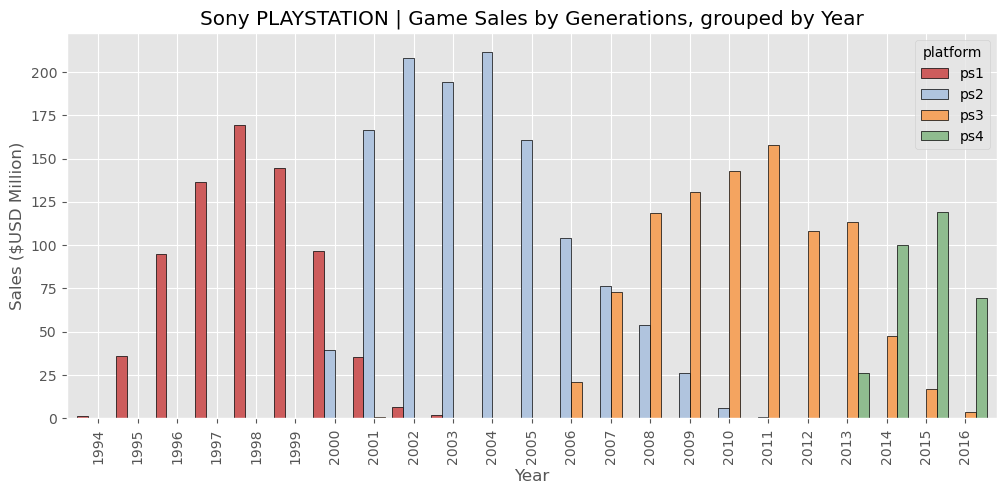

In [65]:
# Total Playstation sales grouped by Generation and Year:

(df
 .query("platform == ['ps1', 'ps2', 'ps3', 'ps4']")
 .pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', width=1.1, edgecolor='black', color=['indianred', 'lightsteelblue', 'sandybrown', 'darkseagreen'], figsize=(12,5))

)

plt.title('Sony PLAYSTATION | Game Sales by Generations, grouped by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($USD Million)')

plt.show()

**Observations:** 
<br>
>The 2nd generation of Sony's Playstation provides the most representative information about the average lifespan of home consoles. From start to end of the PS2 life cycle, ***it took 12 years for the platform to be phased out in its entirety, while taking just under 7 years for a new iteration to take its place.*** Our PS3 life cycle seems to be following this trend, as it is expected PS3 sales for 2017 to be close to null. In fact, all our generations take roughly the same amount of time before transitioning between each other. For our forecast,***it will be useful to slice our data from 2013 onwards, as that is when our PS4 console was launched.***

In [66]:
# Investigating 2001 PS3 entry(s):

display(df.query('year == 2001')['platform'].value_counts())
df.query("year == 2001 and platform == 'ps3'")

ps2    185
gba    107
ps1     91
xb      36
gc      23
pc      15
gb      10
n64      9
dc       8
ps3      1
Name: platform, dtype: int64

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
3849,sonic the hedgehog,ps3,2001,platform,0.0,0.48,0.0,0.0,0.48,43.0,41.0,E10+


**Observations:**
<br>
>Our PS3 entry for the year 2001 doesn't make sense, as the PS3 was launched in 2006. Via an internet search, matching platform brand and critic score, we found the entry (Sonic the Hedgehog) to have been released in 2006. ***As such, we will swap these values.***

In [67]:
# Replacing our year value for Sonic the Hedgehog:

df.loc[4104, 'year'] = 2006

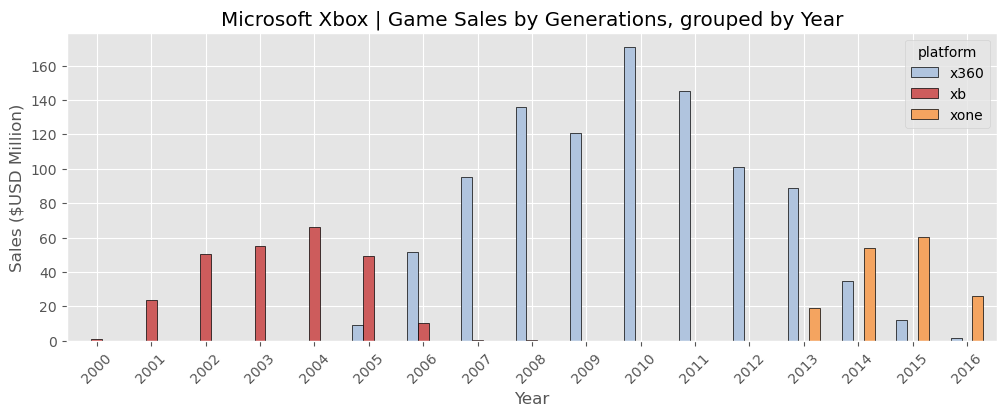

In [68]:
# Total Xbox sales grouped by Generation and year:

(df
 .query("platform == ['xb', 'x360', 'xone']")
 .pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', width=0.6, edgecolor='black', color=['lightsteelblue', 'indianred', 'sandybrown'], figsize=(12,4))

)

plt.title('Microsoft Xbox | Game Sales by Generations, grouped by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($USD Million)')
plt.xticks(rotation=45)


plt.show()

**Observations:**
<br>
>Similar to the Playstation data, the time it takes for the Xbox 360 to phase out is roughly ***12 years*** as well. Keep in mind this is the first generation of the Xbox that was succesful, surpassing anything the first generation Xbox accomplished, so comparing them wouldn't be very fair. ***As such, we will slice data from as far back as 2013, the beginning of our Xbox One console.***

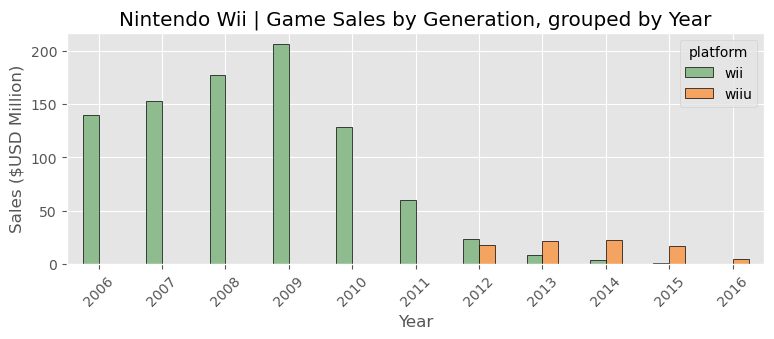

In [69]:
# Total Nintendo Wii sales grouped by year:

(df
 .query("platform == ['wii', 'wiiu']")
 .pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', width=0.5, edgecolor='black', color=['darkseagreen', 'sandybrown'], figsize=(9,3))

)

plt.title('Nintendo Wii | Game Sales by Generation, grouped by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($USD Million)')
plt.xticks(rotation=45)


plt.show()

**Observations:**
<br>
>For all the success of the Wii platform, its successor has not enjoyed similar sales figures. Game sales for the Wii U has a comparatively low and flat distribution; reception has been poor and sales have not picked up throughout its lifespan despite what we have seen with the Playstation and Xbox platforms. Furthermore, sales figures seem to be dipping this year as well. ***There aren't many trends to spot here, apart from the fact the year of 2017 could be the year we see the entirety of the Wii lineup diminish completely, especially with the prowess of the 2 big players in the market, Sony and Microsoft. As sales figures have not entirely diminished yet though, we will include Wii and Wii U data by slicing from 2013 onwards, that is, the period whereby our PS4 and Xbox One consoles launched.***

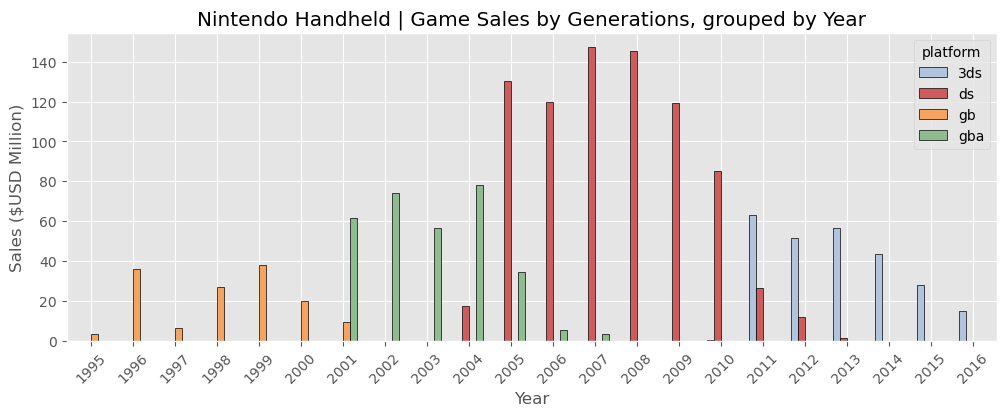

In [70]:
# Total Nintendo Handheld Game sales grouped by year:

(df
 .query("platform == ['ds', '3ds', 'gb', 'gba']")
 .pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', width=0.65, edgecolor='black', color=['lightsteelblue', 'indianred', 'sandybrown', 'darkseagreen'], figsize=(12,4))

)

plt.title('Nintendo Handheld | Game Sales by Generations, grouped by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($USD Million)')
plt.xticks(rotation=45)


plt.show()

**Observations:**
<br>
>Similar to our Playstation and Xbox plots, the Nintendo DS platform took roughly 7 years before it was replaced with the newer 3DS. The Nintendo DS platform was an evident success, while the 3DS wasn't. However, it's worth noting that the 3DS is an improved iteration of the DS, rather than a completely new platform. Instead of looking at them then as two separate entities, we need to observe them as one identical platform. The lower sales might just indicate the population did not see buying the same platform of which possesses marginal improvements, as an upgrade. However, the data present for the 3DS has not come to a complete halt, and thus we should include them inside our analysis, ***which we will slice from 2013 onwards.***

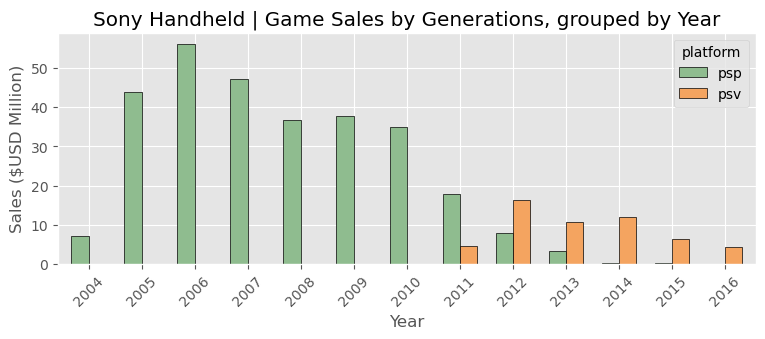

In [71]:
# Total Sony Handheld Game sales grouped by year:

(df
 .query("platform == ['psp', 'psv']")
 .pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='bar', width=0.65, edgecolor='black', color=['darkseagreen', 'sandybrown'], figsize=(9,3))

)

plt.title('Sony Handheld | Game Sales by Generations, grouped by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($USD Million)')
plt.xticks(rotation=45)


plt.show()

**Observations:**
<br>
>Similar to our plot on the Nintendo Wii platforms, Sony's PSP started off well (still comparatively weak to other handheld platforms but nevertheless..), but has seen a steady decline even after introducing the upgraded PS Vita. ***As the decline has not come full circle yet, we will include data for Sony's handheld PSP and PS Vita from 2013 onwards.***

In [72]:
# Getting our DataFrame for Period of Study:

df1 = df.query("year >= 2013")

In [73]:
df1.platform.value_counts()

ps4     392
psv     358
ps3     345
3ds     303
xone    247
pc      192
x360    186
wiiu    115
psp      68
wii      23
ds        8
Name: platform, dtype: int64

In [74]:
# Final Check

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 13 to 16072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2237 non-null   object 
 1   platform      2237 non-null   object 
 2   year          2237 non-null   int32  
 3   genre         2237 non-null   object 
 4   na_sales      2237 non-null   float64
 5   eu_sales      2237 non-null   float64
 6   jp_sales      2237 non-null   float64
 7   other_sales   2237 non-null   float64
 8   total_sales   2237 non-null   float64
 9   critic_score  2237 non-null   float64
 10  user_score    2237 non-null   float64
 11  rating        2237 non-null   object 
dtypes: float64(7), int32(1), object(4)
memory usage: 218.5+ KB


**RECAP:** 
<br>
>We observed that it takes an average of roughly 12 years for a console to fully diminish from a game sales standpoint, and about 7 years on average for the release of a new generation. For the purpose of forecasting profitable platforms and genres for 2017, we sliced our data from 2013 onwards to account for the start of our newest generation of consoles.                                

## 5.2. Analyzing Profitable Platforms <a id="ha2"> </a>

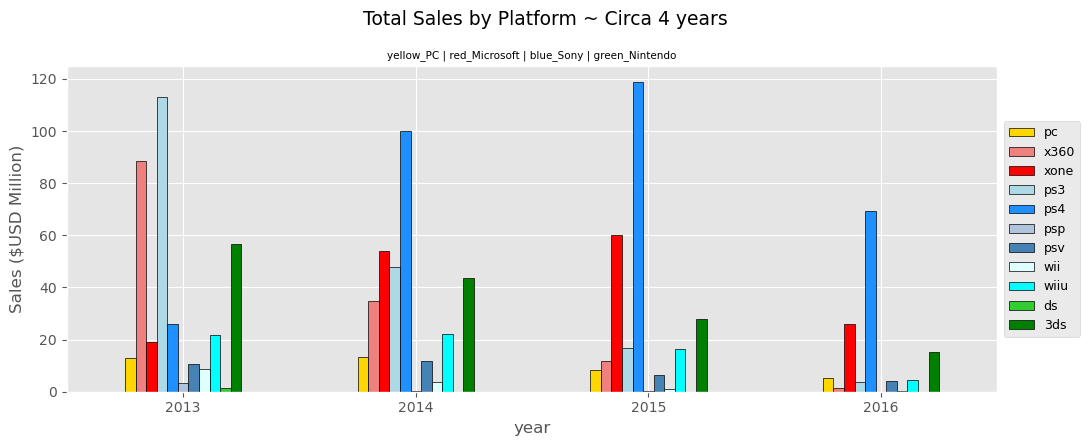

In [75]:
# Investigating sales figures over the past 4 years:

(df1
 .pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')
 .iloc[:, np.r_[2, -2, -1, 3:7, -4, -3, 1, 0]]     # Rearranging platforms by bins of respective brands
 .plot(kind='bar', edgecolor='black',
       color=['gold', 'lightcoral', 'red', 'lightblue', 'dodgerblue', 'lightsteelblue', 
              'steelblue', 'lightcyan', 'cyan', 'limegreen', 'green'],
       figsize=(11,4.5))
)

plt.suptitle('Total Sales by Platform ~ Circa 4 years', fontsize=13.5)
plt.title('yellow_PC | red_Microsoft | blue_Sony | green_Nintendo', fontsize=7.5)
plt.xticks(rotation=360)
plt.ylabel('Sales ($USD Million)')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 9})
plt.tight_layout()
plt.show()

**Observations and Proceeding Steps:**
<br>
<br>
***N/B***: First caveat to note is that our data for 2016 is incomplete as the year has not come to an end as yet. 4th quarter results have yet to be captured, while there will most probably be games released in the month of December itself. That said, our plot depicts our older generation platforms rapidly declining in the year proceeding a new platform launch, and this is true amongst all our platforms' brands. Second caveat to note is that as priorly observed, it takes about 7 years for a new generation launch of a platform, and about 12 years for a console to diminish completely in terms of game sales.
<br>
<br>
>Among our handheld platforms, Playstation's PS Vita has barely made an impact in relation to its other handheld counterparts. Nintendo's 3DS has been going strong over the course of the past 4 years. While its starting to decline a little, it has already gone through 6 years of its lifecycle and could probably receive a refresh soon. Our 2016 3DS sales values are misleading as well, as priorly mentioned about incomplete data for the year, sales figures could well be higher than \\$20 million.
<br>
<br>
For our home consoles, Nintendo's Wii U has been unable to gain enough traction to compete with the market leaders of Sony and Microsoft after doing immensely well for its first-generation Wii, hovering at or below the \\$20 million mark for most of its lifespan and is on a decline. On the other end of the spectrum, Sony and Microsoft are doing tremendously for themselves, both previous and current generation. The Playstation 4 is the obvious winner here, but the Xbox One is still a worthy 2nd. They both top the charts by miles over other platforms, and could potentially still be trending upwards this year, as we can almost spot an inverted bell curve distribution. Keeping in mind uncaptured sales data for 2016, we can expect these figures to be much higher than we currently observe in our plot.
<br>
<br>
The PC platform shows a trend of being consistently lower than the big players of the gaming market. PC game sales do seem to be trending towards a decline, but all in all this makes sense because of the higher barriers to entry into PC gaming. Laptops, pre-built and custom-built PCs overall are inherently pricier than their console counterparts; this includes internal hardware as well as peripherals. As internal components start to degrade, it might not be in the best financial interest of a gamer to upgrade to another PC yet. Moreover, console gaming is more convenient and accessible. To top it all off, it has a wider online community from a socially-driven perspective.
<br>
<br>
***Moving forward, we'd like to look into the Playstation 4, Xbox One and Nintendo 3DS as they represent our other most profitable platforms in the current generation of console gaming.***

In [76]:
# Slicing entries of latest high profit consoles:

data = df1.query("platform == ['ps4', 'xone', '3ds']")

In [77]:
# Overview of new sliced table:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 25 to 16036
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          942 non-null    object 
 1   platform      942 non-null    object 
 2   year          942 non-null    int32  
 3   genre         942 non-null    object 
 4   na_sales      942 non-null    float64
 5   eu_sales      942 non-null    float64
 6   jp_sales      942 non-null    float64
 7   other_sales   942 non-null    float64
 8   total_sales   942 non-null    float64
 9   critic_score  942 non-null    float64
 10  user_score    942 non-null    float64
 11  rating        942 non-null    object 
dtypes: float64(7), int32(1), object(4)
memory usage: 92.0+ KB


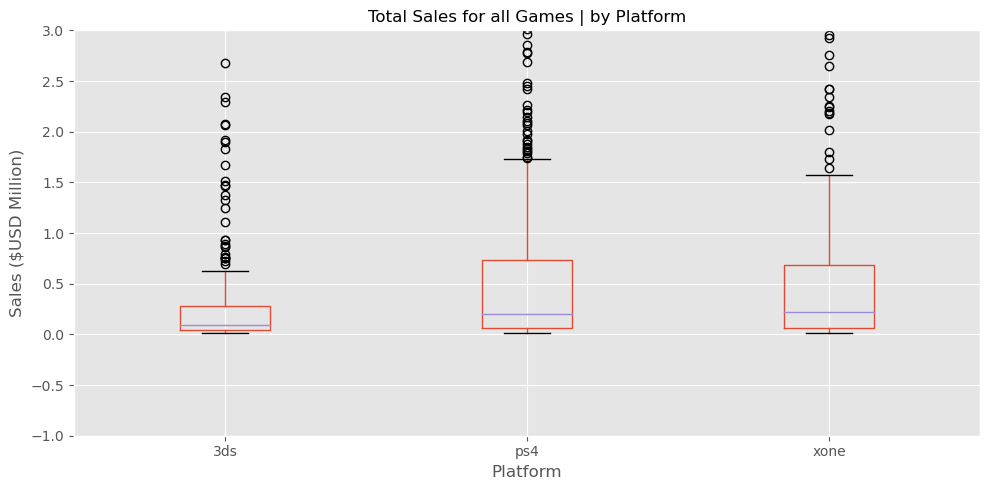

          count      mean       std   min   25%   50%    75%    max
platform                                                           
3ds       303.0  0.472772  1.381347  0.01  0.04  0.09  0.280  14.60
ps4       392.0  0.801378  1.609456  0.01  0.06  0.20  0.730  14.63
xone      247.0  0.645020  1.036139  0.01  0.06  0.22  0.685   7.39


In [78]:
# Boxplot comparisons between platforms, sorted from lowest to highest:

def boxplot_sorted(data, figure_size, by, column,  rot=0): 
    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    meds = data2.median().sort_values()
    return data2[meds.index].boxplot(rot=rot, return_type="axes")


figure = plt.figure(figsize=(10,5))
axes = boxplot_sorted(data, figure, by = ['platform'], column = 'total_sales')

plt.ylim(-1, 3)
plt.title('Total Sales for all Games | by Platform', fontsize=12)
plt.xlabel('Platform')
plt.ylabel('Sales ($USD Million)')
plt.tight_layout()
plt.show()
print(data.groupby('platform')['total_sales'].describe())

**Observations and Inferences:**
<br>
>By looking at our median values, it is clear our 2 home console platforms perform consistently when disregarding outliers. In comparison, the handheld Ninetendo 3DS sales amount to a little below half of our market leaders in the home console category.
<br>
<br>
Our Q3 figures that tells a similar story. The PS4 and Xbox One have more games that perform significantly better than the average, while the Nintendo 3DS again amounts to about half of our market leaders. To add, in the gaming industry, we are actually extremely interested in our figures above and away from the average. Most of the gaming population do not jump from game to game every other week or month. They are more likely to settle on something for weeks on end. This is very much true for online multiplayers (but not exclusively), whereby the aspect of competition takes precedence over anything else. Our Q3 figures and beyond tell us which platforms contain games that fit this criteria of being massively popular to a large subset of the population(s).
<br>
<br>An example of this would be Call of Duty: Black Ops 3 which amounted to \\$14.63 million PS4 sales since its release in 2015. Another example of a 'sports' genre multiplayer would be FIFA 16, being played by the masses on both the PS4 and Xbox platforms.
<br>
<br>
This phenomenon is also true for single-player Triple AAA (open-world RPG) titles like the Witcher 3: Wild Hunt, the 3rd iteration of the Witcher franchise which won Game of the Year, 2015. It amounted to nearly \\$4 million PS4 sales thus far.
<br>
<br>
Generally speaking, most home console games are shared between the Xbox and Playstation platforms, apart from a select few franchises that are brand-specific releases (ie: Uncharted franchise, PS4). It's obvious that the Playstation and Xbox consoles are the market leaders in console gaming.
<br>
<br>
Nintendo's handheld platforms are in a different space altogether. As they are handheld consoles, the nature of their games are also vastly different to those of home consoles. That being said, Nintendo's offerings are quite niche and a lot of them are brand-bound to Nintendo. For example, their best-selling franchises of Pokemon and Zelda will not be found in Sony and Microsoft's consoles.

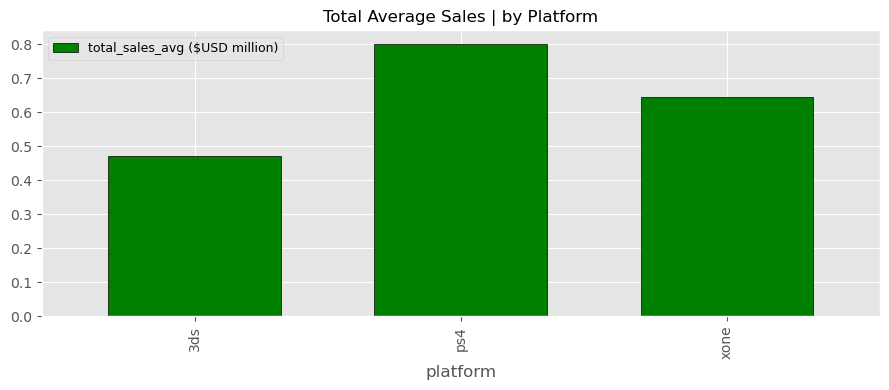

In [79]:
# Observing average sales across all games in each platform:

(data
 .pivot_table(index='platform', values='total_sales', aggfunc='mean')
 .plot(kind='bar', width=0.65, edgecolor='black', color='green', figsize=(9,4))

)

plt.title('Total Average Sales | by Platform', fontsize=12)
plt.legend(['total_sales_avg ($USD million)'], loc='upper left', prop={'size': 9})

plt.tight_layout()
plt.show()


**Observations:** 
<br>
>Our prior analysis was correct. Out of the 3 most profitable platforms, the 3DS is considered a niche market, whereby a smaller average market share is observed. Of the 2 non-niche platforms that contain the majority of our gaming population, the PS4 assumes a higher market value share and with it, much higher relative sales figures. This is due to the PS4 having much better-performing outliers than the Xbox One.

## 5.3. PS4 | Correlation Between Critic/User Scores and Total Sales  <a id="ha3"> </a>

**Section Breakdown:**
<br>
> To analyze correlations between review scores and total sales, both score columns wil be plotted on the same scatterplot against our total sales column. We'd like to find any nuanced trends that arise from possible score thresholds that we may observe. For example, we can assume a score of 10/100 would most likely result in low sales, so at what score threshold do our game sales start picking up and do they differ between both sets of scores? Let's use the PS3 which accounts for our highest overall sales figures as a benchmark.

In [80]:
# Slicing data on the PS4 platform:

data_ps4 = df1.query("platform == 'ps4' and user_score >= 0 and critic_score >= 0")

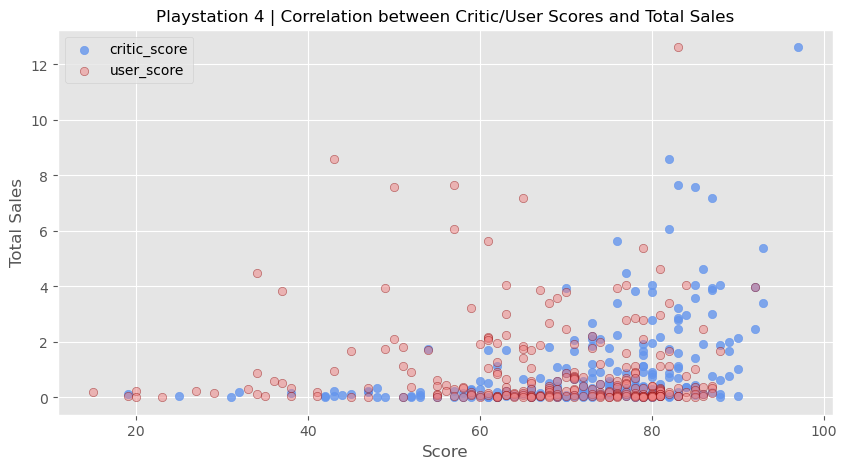

Critic Score | Total Sales PCC: 0.40589480145836687
User Score | Total Sales PCC: -0.03362497596528888


In [81]:
# Finding the correlation between critic/user scores and total sales (Playstation 4):
## PLotting a Scatterplot and calculating Pearson's Correlation Coefficient

plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(data_ps4.critic_score, data_ps4.total_sales,
            color='cornflowerblue', alpha=0.8, label='critic_score')
plt.scatter(data_ps4.user_score, data_ps4.total_sales, edgecolor='darkred', 
            color='lightcoral', alpha=0.5, label='user_score')

plt.title('Playstation 4 | Correlation between Critic/User Scores and Total Sales', fontsize=12)
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()

plt.tight_layout
plt.show()

print("Critic Score | Total Sales PCC:", data_ps4['critic_score'].corr(data_ps4['total_sales']))
print("User Score | Total Sales PCC:", data_ps4['user_score'].corr(data_ps4['total_sales']))

**Observations:**
<br>
> Our game sales start picking up roughly around the 70 score mark. Both sets of score categories tend upwards from this point, but it appears that our sales in-line with an increasing critic score increases much more dramatically than sales in-line with our user scores. One could even say that our sales based on user scores stagnates a little.
<br>
<br>Let's look at our Pearson's coefficient: both sets of scores exhibit a positive correlation, which is obvious. However, our game sales appear to be extremely independent of user scores, with a -0.03 PCC. ***Sales based on critic scores seem to correlate better, and that conclusively shows that the users are more likely to purchase a game based on critic scores, as that may imply higher credibility than user reviews.*** 

In [82]:
# Finding the Pearson's Correlation Coefficient between critic/user scores and total sales (Playstation 4):
## FOR condition = Scores above 70

data_ps4 = data_ps4.query("user_score >= 70 and critic_score >= 70")

print("Critic Score >= 70 | Total Sales PCC:", data_ps4['critic_score'].corr(data_ps4['total_sales']))
print("User Score >= 70 | Total Sales PCC:", data_ps4['user_score'].corr(data_ps4['total_sales']))

Critic Score >= 70 | Total Sales PCC: 0.5002680499293224
User Score >= 70 | Total Sales PCC: 0.06797566978145647


**Observations and Conclusions:**
<br>
> When filtering out scores below 70, we can see our Pearson's coefficient tend towards even higher dependency. Our user score coefficient still remains very low, but our critic scores have jumped up dramatically. Thus, we can conclude that while our prior observation was true, ***the rate of users buying a game based off of critic scores improves the higher the critic score is. We could also assume to a lesser extent that the same is true for users looking at user review scores, except that it does not hold nearly as heavy a weight as review scores coming from critics.***

## 5.4. Comparing popular Cross-Platform games  <a id="ha4"> </a>

**Section Breakdown:**
> Earlier, we observed several games franchises that were released across varying platforms, in other words cross-platform games. We'd like to compare sales for cross-platform games on the PC, Xbox One and PS4. By using game franchises that are constant across several platforms, we can gauge the overall populations' platform preferences. Eventhough the 3DS is considered a top-3 performing platform in our study, it is a handheld console and in essnece, a different kind of platform compared to the PS4 and Xbox One. We chose the PC platform on the other hand because it represents a universal platform that is used by the masses. Quite a few home console games inevitably get ported to the PC eventually. ***To filter for popular games, we will be using the 3rd quartile value of our 'total_sales' column as our starting point, as that will represent games that do significantly better than the average.***

In [83]:
# Getting our 3rd Quartile value to filter for popular games:

print(df1['total_sales'].describe())

count    2237.000000
mean        0.487957
std         1.234181
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64


In [84]:
# Filtering for popular games above the 0.4 mil threshold:

data_cross = df1.query("total_sales >= 0.4 and platform == ['ps4', 'pc', 'xone']")

In [85]:
# Querying cross-platform games:

count_games = data_cross['name'].value_counts()
three_platform_games_list = count_games[count_games==3].index.to_list()
data_cross = data_cross.query("name in @three_platform_games_list")

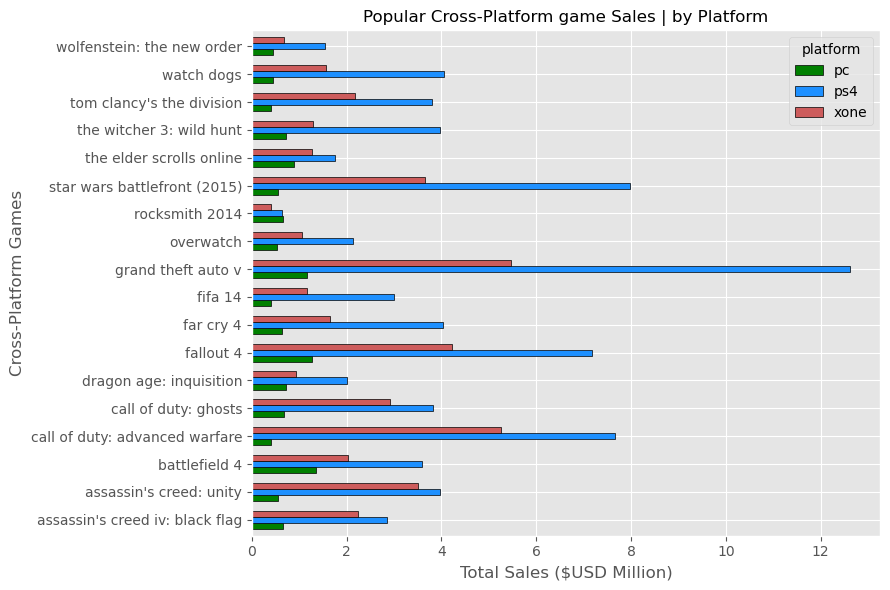

In [86]:
# Bar chart to compare sales of cross-platform games between differing platforms:

(data_cross
 .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='barh', width=0.65, edgecolor='black', color=['green', 'dodgerblue', 'indianred'], figsize=(9,6))
)

plt.title('Popular Cross-Platform game Sales | by Platform', fontsize=12)
plt.ylabel('Cross-Platform Games')
plt.xlabel('Total Sales ($USD Million)')

plt.tight_layout()
plt.show()

**Observations and Conclusions:**
<br>
> By investigating top-selling cross-platform games, we can conclude that there is a lower share of PC users across the board, bar 'RockSmith 2014'. When comparing between our other two home-console platforms, we observe a complete win for the PS4 throughout the graph. It's clear then, that Sony's PS4 is the preferred brand over the Xbox One, irrespective of the genre and nature of the game.

## 5.5. Analyzing Profitable Genres  <a id="ha5"> </a>

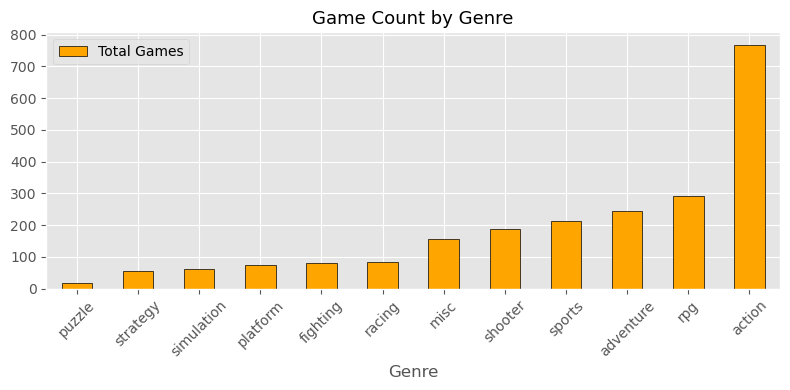

In [87]:
# Bar chart on game count by genre:

(df1.pivot_table(index='genre', values='name', aggfunc='count')
 .sort_values('name')
 .plot(kind='bar', edgecolor='black',color='orange', figsize=(8,4))
)

plt.title('Game Count by Genre', fontsize=13) 
plt.legend(['Total Games'])
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()

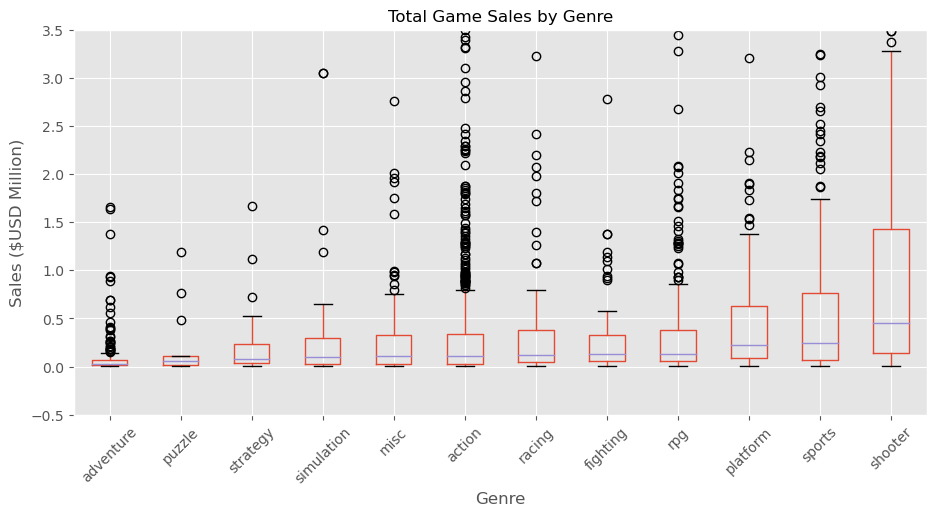

In [88]:
# Boxplot on total game, grouped by genre:

def boxplot_sorted(data, figure_size, by, column,  rot=0): 
    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    meds = data2.median().sort_values()
    return data2[meds.index].boxplot(rot=rot, return_type="axes")


figure = plt.figure(figsize=(11,5))
axes = boxplot_sorted(df1, figure, by = ['genre'], column = 'total_sales')

plt.ylim(-0.5, 3.5)
plt.title('Total Game Sales by Genre', fontsize=12)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Sales ($USD Million)')


plt.show()


**Observations:**
<br>
The underlying concensus from looking at game counts by genres and average sales by genre, is that the latter isn't necessarily positively correlated with the former. Our 'shooter' genre sits 5th on our game count table, but tops our sales charts. In contrast, the 'action' genre has the most numbers of games released, but ranks only 7th in our sales charts. Quite surprisingly, the 'adventure' genre came in 3rd in total games released but performed the worst out of all genres studied. 
<br> 

> ***Conclusions on our top 3 best-selling genres -*** We can see some similar underlying trends between them, in that they are characterized by relatively fast-paced gameplay and are community driven based on its multiplayer nature. Here's the breakdown:
<br>
<br>
    1. The Shooter genre as studied earlier contains many games that are best sellers overall. Games like Battlefield and Call of Duty are cult favourites, and have many generational releases to confirm this notion. The fact that these games tend towards multiplayer gameplay may also explain why they do so well, as community breeds community, not to forget the aspect of competitive gameplay.
    <br><br>2. Our 'sports' genre is extremely similar to our analysis on the 'shooter' genre, in that is heavily focused on community interaction and competitive gameplay. As we can imagine, sports is enjoyed by the masses, and it shows in both our game count and sales charts.  One standout title that appears every year is the FIFA franchise, beloved all over the world.
    <br><br>3. The platform genre has one of the least game counts among all genres; However, they possess a sales average that is 3rd on our sales charts. This genre is characterized by its fast gameplay and its accessibility, in the sense that it is less graphically intensive on a gaming console and hence would be able to run smoothly on handheld consoles and home consoles alike. Nevertheless, this is a case of quality over quantity.
    <br><br>
> ***Conclusions on our 3 worst-selling genres -*** We observe similar underlying trends of slower-paced, investigative and ordered gameplay. There is a lot of puzzle-solving involed with these genres, with a greater emphasis on story-telling and unlike our top selling genres, is less community driven.

# 6. <u>User Profiles</u>  <a id="up"> </a>

In [89]:
# Getting data slices for each major region:

data_na = df1[['name', 'platform', 'year', 'genre', 'na_sales']]
data_eu = df1[['name', 'platform', 'year', 'genre', 'eu_sales']]
data_jp = df1[['name', 'platform', 'year', 'genre', 'jp_sales']]

## 6.1. Top 5 Platforms by Region Sales   <a id="up1"> </a>

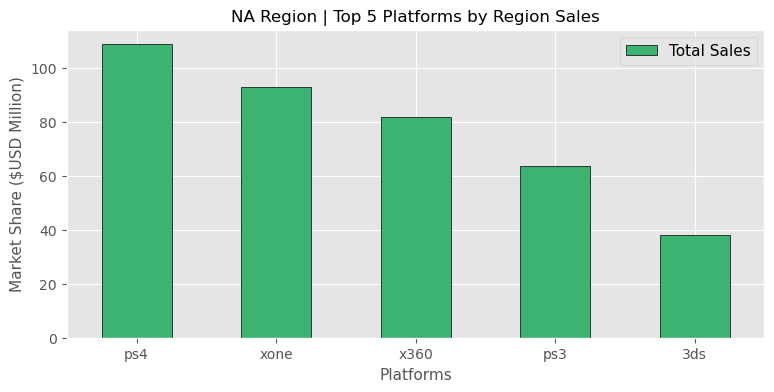

In [90]:
# Investigating NA region sales by platform:

top5 = data_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).index[:5]
na_platform = data_na[data_na['platform'].isin(top5)]

(na_platform
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values('na_sales', ascending=False)
 .plot(kind='bar', grid=True, edgecolor='black', color='mediumseagreen', figsize=(9,4))
)

plt.title('NA Region | Top 5 Platforms by Region Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper right', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('Platforms', fontsize=11)

plt.xticks(rotation=360)

plt.show()

**Observations:**
<br>
> Similar to our analysis on average sales by current generation platforms, our PS4 sales figures lead the way in the NA region, followed by the Xbox One. Microsoft's American origins and hence, stronger geographical presence may have some influence on how it's Xbox One's sales have nearly caught up with the PS4. The Nintendo 3DS, our only current generation handheld console representing our top 5 platforms, in contrast amounts to less than 40% of total PS4 sales, so we can conclude the handheld console isn't as popular in North America, but shoud not be ignore as it still represents a respectable share of total market sales.

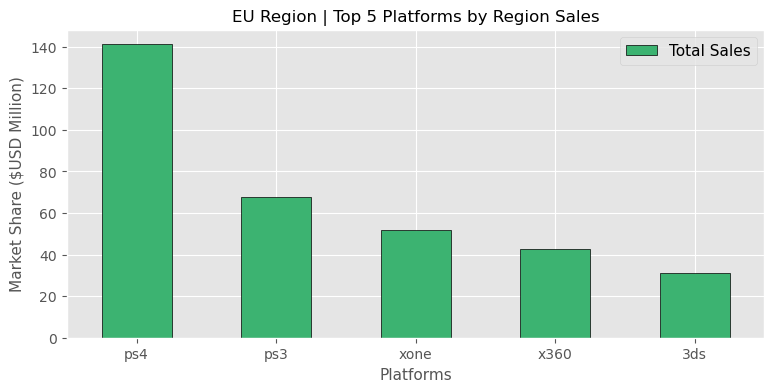

In [91]:
# Investigating EU region sales by platform:

top5 = data_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index[:5]
eu_platform = data_eu[data_eu['platform'].isin(top5)]

(eu_platform
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending=False)
 .plot(kind='bar', grid=True, edgecolor='black', color='mediumseagreen', figsize=(9,4))
)

plt.title('EU Region | Top 5 Platforms by Region Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper right', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('Platforms', fontsize=11)

plt.xticks(rotation=360)

plt.show()

**Observations:**
<br>
> Focusing on current generation consoles, our EU region shows exactly the same trends as the NA region, apart from the much larger disparity between PS4 and Xbox One sales. We may attribute this to Microsoft having less of an country-of-origins-based influence in Europe. Still, it tallies with our prior analysis on averages sales by current generation platforms. 

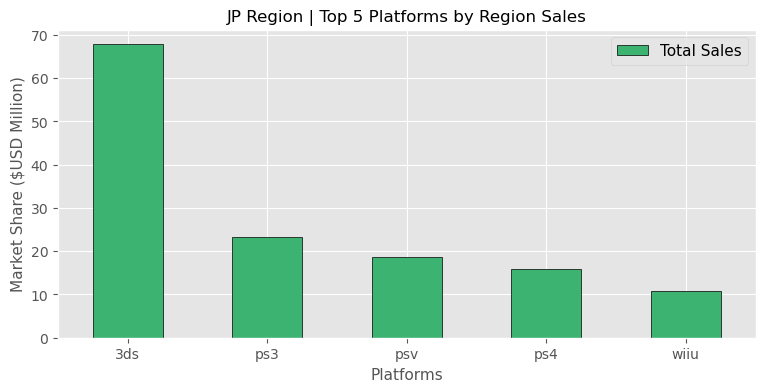

In [92]:
# Investigating JP region sales by platform:

top5 = data_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index[:5]
jp_platform = data_jp[data_jp['platform'].isin(top5)]

(jp_platform
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending=False)
 .plot(kind='bar', grid=True, edgecolor='black', color='mediumseagreen', figsize=(9,4))
)

plt.title('JP Region | Top 5 Platforms by Region Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper right', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('Platforms', fontsize=11)

plt.xticks(rotation=360)

plt.show()

**Observations:**
<br>
> Nintendo's 3DS leads the way in Japan, not surprisingly as they cater more towards the Japanese market with plenty of Japan-only releases. Next, we have a slew of Sony branded platforms represented in our top 5 together with a marginal market share of Nintendo's WiiU, while any of Microsoft's Xbox consoles are nowhere to be found. We can only assume there's a higher geographical brand presence for Nintendo and Sony, as they are of Japanese origins. Either ways, it's clear the handheld platform is highly popular in relation to its home-console counterparts, with 2/3 top platforms being handheld.

## 6.2. Top 5 Genres by Region Sales  <a id="up2"> </a>

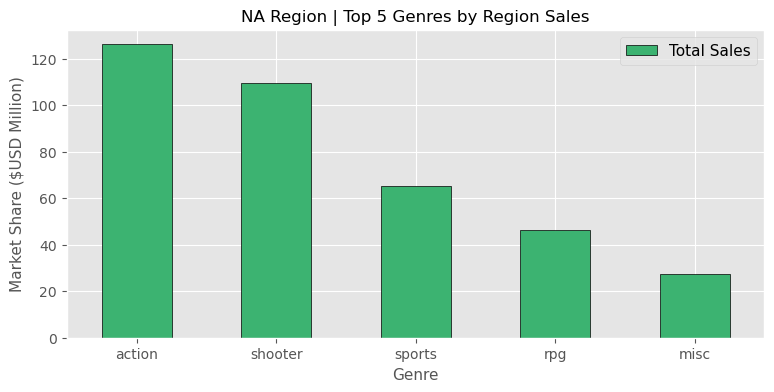

In [93]:
# Investigating NA region sales by genre:

top5 = data_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).index[:5]
na_platform = data_na[data_na['genre'].isin(top5)]

(na_platform
 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values('na_sales', ascending=False)
 .plot(kind='bar', grid=True, edgecolor='black', color='mediumseagreen', figsize=(9,4))
)

plt.title('NA Region | Top 5 Genres by Region Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper right', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('Genre', fontsize=11)

plt.xticks(rotation=360)

plt.show()

In [94]:
# [NA] Getting normalized share of top 5 games in each of our top 3 genres:

display((na_platform
 .query("genre == 'action'")
 .groupby('name')['na_sales'].sum()
 .sort_values(ascending=False).head()
 / na_platform.query("genre == 'action'")['na_sales'].sum()
        ))

display((na_platform
 .query("genre == 'shooter'")
 .groupby('name')['na_sales'].sum()
 .sort_values(ascending=False).head()
 / na_platform.query("genre == 'shooter'")['na_sales'].sum()
        ))

display((na_platform
 .query("genre == 'sports'")
 .groupby('name')['na_sales'].sum()
 .sort_values(ascending=False).head()
 / na_platform.query("genre == 'sports'")['na_sales'].sum()
        ))

name
grand theft auto v                 0.189011
assassin's creed iv: black flag    0.048918
lego marvel super heroes           0.034171
the last of us                     0.034013
watch dogs                         0.030128
Name: na_sales, dtype: float64

name
call of duty: ghosts              0.136140
call of duty: black ops 3         0.111627
call of duty: advanced warfare    0.095772
destiny                           0.060324
battlefield 4                     0.058684
Name: na_sales, dtype: float64

name
madden nfl 16    0.089474
nba 2k16         0.087483
madden nfl 15    0.087330
nba 2k14         0.078597
nba 2k15         0.077524
Name: na_sales, dtype: float64

**Observations:**
<br>
>Our 'action' and 'shooter' genres dominate our genre charts. Our Action genre contains an extremely heavy outlier in the Grand Theft Auto franchise; this is a game that is played both single-player and online, and has a large community. We also know for a fact the Action category contains a lot of popular Triple AAA titles. These tie in with our study on overall best-selling genres; while the average sales for the Action category was comparabaly lower to other high performing genres, we did observe many significant outliers. In contrast, our Shooter genre is dominated by online multiplayer games, case in point the Call Of Duty franchise. Yet again, as seen in our sales charts on Genre, we observed a substantial amount of outliers away from the sales average. As for our sports category coming in third, we do know from daily observation that the NA region is heavily invested in their own sports such as the NBA and NFL, all of which were made into games that have yearly iterations. This phenomenon is clearly depicted by our chart on top 5 sports games in the NA region.

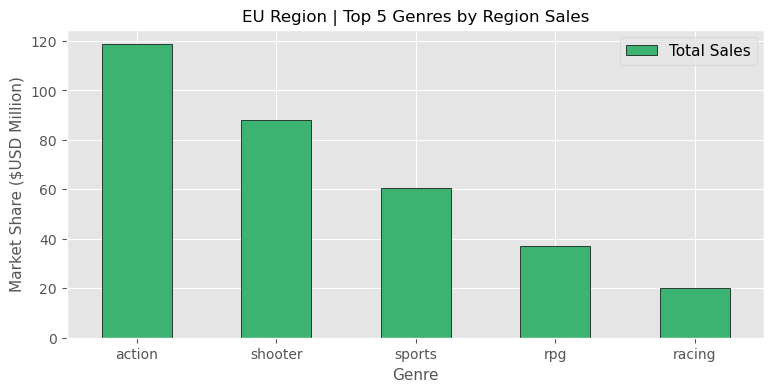

In [95]:
# Investigating EU region sales by genre:

top5 = data_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).index[:5]
eu_platform = data_eu[data_eu['genre'].isin(top5)]

(eu_platform
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales', ascending=False)
 .plot(kind='bar', grid=True, edgecolor='black', color='mediumseagreen', figsize=(9,4))
)

plt.title('EU Region | Top 5 Genres by Region Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper right', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('Genre', fontsize=11)

plt.xticks(rotation=360)

plt.show()

In [96]:
# [EU] Getting normalized share of top 5 games in each of our top 3 genres:

display((eu_platform
 .query("genre == 'action'")
 .groupby('name')['eu_sales'].sum()
 .sort_values(ascending=False).head()
 / eu_platform.query("genre == 'action'")['eu_sales'].sum()
        ))

display((eu_platform
 .query("genre == 'shooter'")
 .groupby('name')['eu_sales'].sum()
 .sort_values(ascending=False).head()
 / eu_platform.query("genre == 'shooter'")['eu_sales'].sum()
        ))

display((eu_platform
 .query("genre == 'sports'")
 .groupby('name')['eu_sales'].sum()
 .sort_values(ascending=False).head()
 / eu_platform.query("genre == 'sports'")['eu_sales'].sum()
        ))

name
grand theft auto v                 0.197454
assassin's creed iv: black flag    0.043167
the last of us                     0.035242
watch dogs                         0.033387
lego marvel super heroes           0.032965
Name: eu_sales, dtype: float64

name
call of duty: black ops 3         0.108013
call of duty: ghosts              0.101184
call of duty: advanced warfare    0.094468
battlefield 4                     0.061803
star wars battlefront (2015)      0.058616
Name: eu_sales, dtype: float64

name
fifa 15     0.198612
fifa 16     0.183245
fifa 14     0.181097
fifa 17     0.144415
wwe 2k15    0.021315
Name: eu_sales, dtype: float64

**Observations:**
<br>
> Our EU sales data depict an identical trend with the NA region, apart from our 5th placed genre, being the Racing genre instead of the Miscellaneous genre. The top 3 are again, Action, Shooters and Sports. The Action and Sports categories are represented by roughly the same game franchises; Action is dominated by the Grand Theft Auto franchise and identical Triple AAA titles while Shooter is dominated by the Call of Duty franchise. The clear difference between the NA and EU region is seen in the Sports category with a staggering representation by the FIFA franchise. This is obvious, as there is an inclination towards soccer in Europe, rather than US-based sports. 

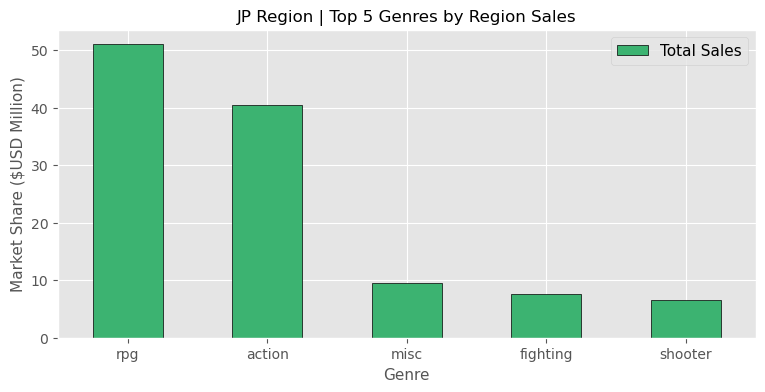

In [97]:
# Investigating JP region sales by genre:

top5 = data_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index[:5]
jp_platform = data_jp[data_jp['genre'].isin(top5)]

(jp_platform
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales', ascending=False)
 .plot(kind='bar', grid=True, edgecolor='black', color='mediumseagreen', figsize=(9,4))
)

plt.title('JP Region | Top 5 Genres by Region Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper right', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('Genre', fontsize=11)

plt.xticks(rotation=360)

plt.show()

In [98]:
# [JP] Getting normalized share of top 5 games in each of our top 3 genres:

display((jp_platform
 .query("genre == 'rpg'")
 .groupby('name')['jp_sales'].sum()
 .sort_values(ascending=False).head()
 / jp_platform.query("genre == 'rpg'")['jp_sales'].sum()
        ))

display((jp_platform
 .query("genre == 'action'")
 .groupby('name')['jp_sales'].sum()
 .sort_values(ascending=False).head()
 / jp_platform.query("genre == 'action'")['jp_sales'].sum()
        ))


name
pokemon x/pokemon y                          0.085227
monster hunter 4                             0.067398
yokai watch 2 ganso/honke                    0.062304
pokemon omega ruby/pokemon alpha sapphire    0.060737
yokai watch 2 shinuchi                       0.052508
Name: jp_sales, dtype: float64

name
monster hunter x              0.068906
yokai watch busters           0.056557
grand theft auto v            0.035070
yokai watch 3                 0.032848
luigi's mansion: dark moon    0.027414
Name: jp_sales, dtype: float64

**Observations:**
<br>
> Our JP sales charts strays from the norm in the NA and EU regions. As we know the Japan region is a niche market, we see a different trend in popular genres, with a top 2 of 'rpg' and 'action' in that order. The games in these categories are born and bred in the Japanese market, apart from the Grand Theft Auto franchise. Moreover, there are a lot of intersecting games from both genres, and we could probably attribute this to games that are cross-platform in nature. The predominant franchises are Pokemon, Monster Hunter and Yokai Watch.

## 6.3. Correlation between ESRB ratings and Region Sales  <a id="up3"> </a>

**N/B:**
<br>
> We will be ignoring any 'RP' ratings as they represent games that did not receive a rating yet, if at all.

In [99]:
# Slicing data from different regions:

data_na = df1[['name', 'platform', 'year', 'genre', 'na_sales', 'rating']]
data_eu = df1[['name', 'platform', 'year', 'genre', 'eu_sales', 'rating']]
data_jp = df1[['name', 'platform', 'year', 'genre', 'jp_sales', 'rating']]

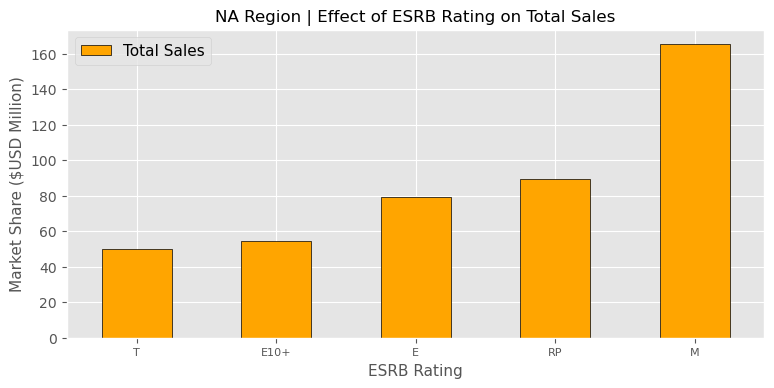

In [100]:
# Investigating effect of ESRB rating on NA sales:

(data_na
 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values('na_sales')
 .plot(kind='bar', grid=True, edgecolor='black', color='orange', figsize=(9,4))
)

plt.title('NA Region | Effect of ESRB Rating on Total Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper left', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('ESRB Rating', fontsize=11)

plt.xticks(fontsize=8, rotation=360)

plt.show()

**Observations:**
<br>
> Its evident that most of our sales in the NA region derive from games rated for Everybody and Mature 17+. Quite surprsingly there aren't any games rated for Adults Only 18+. A quick Google search will show that there are only a handful of these in the market, as they comprise games of strong sexual themes and/or extreme levels of violence. Moving forward, we can agree with the results of our bar plot. The Everybody rating is self explanatory; users of all ages can enjoy these forms of games and for our Mature category, we concur based off of our Genre analysis that our total sales-leading 'action' and 'shooter' genres in the NA region performed the best, which mose likely falls into said category. On top of this, we can possibly also infer that the E10+ and Teens category lags a little behind our leading rating categories, possibly due to parental controls put in place for children in these age groups.

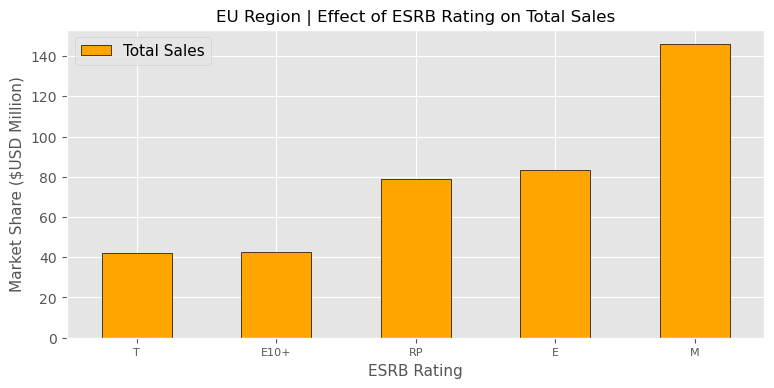

In [101]:
# Investigating effect of ESRB rating on EU sales:

(data_eu
 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values('eu_sales')
 .plot(kind='bar', grid=True, edgecolor='black', color='orange', figsize=(9,4))
)

plt.title('EU Region | Effect of ESRB Rating on Total Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper left', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('ESRB Rating', fontsize=11)

plt.xticks(fontsize=8, rotation=360)

plt.show()

**Observations:**
<br>
> Like most of our analysis, our EU data tallies identically with our NA data. Apart from overall total volume of sales, sales distribution across all ratings are identical.

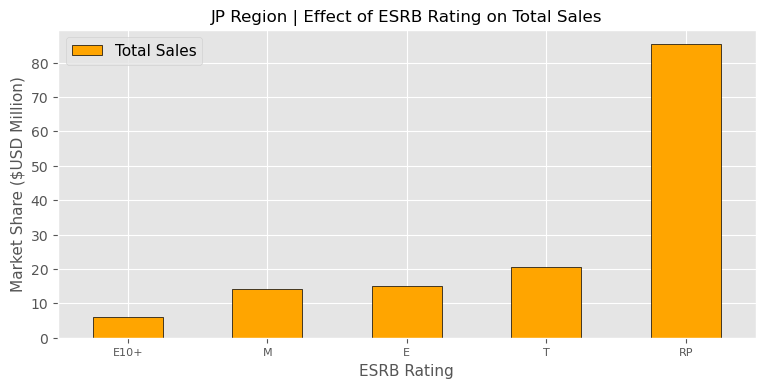

In [102]:
# Investigating effect of ESRB rating on JP sales:

(data_jp
 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values('jp_sales')
 .plot(kind='bar', grid=True, edgecolor='black', color='orange', figsize=(9,4))
)

plt.title('JP Region | Effect of ESRB Rating on Total Sales', fontsize=12)
plt.legend(['Total Sales'], loc='upper left', prop={'size': 11})
plt.ylabel('Market Share ($USD Million)', fontsize=11)
plt.xlabel('ESRB Rating', fontsize=11)

plt.xticks(fontsize=8, rotation=360)

plt.show()

**Observations:**
<br>
<br>
**N/B:** Our leading 'RP' rating is a little misleading. As we found out earlier in prior studies, Japan is a niche market with a large subset of its games being catered only for the Japanese market. For local-only games, Japan has their own version of the ESRB rating, named 'Computer Entertainment Rating Organization'(CERO). For games that are released worldwide to all possible regions, Japanese game developers would submit their games to the ESRB. In this scenario, we can clearly see that Japanese-only games perform the best and are clearly favoured over internationally-released games. However, in this particular study, we are only interested in the ESRB rating and hence, below are our findings on the Japanese market:
> As observed in prior analysis, behavioural trends in our Japan region is dissimilar to our other regions, bar the E rating. We have much more games sales tied to the Teen rating rather than the M rating. Do we have more teenagers playing games in the Japanese market? This correlates with our previous analysis on sales by genre, as we could see less 'shooter' genres and more RPG and Action games; these genres are usually rated for users of most ages. It was also found that the primary platform used in Japan is the Nintendo 3DS; this could possibly correlate with the fact that handheld consoles are much more financially accessible (for teenagers), or the fact that it just proves once again the Japanese gaming population tend towards different kinds of games (perhaps less violent genres(?)) compared to our NA and Eu audience. Either ways, one thing we can confirm is that holding the E rating constant, T-rated games take precedence over the M rating that was seen in our other regions. We concur again, the Japanese market is a niche one, and thus exhibits differing behavioural charateristics to the rest of our population.

# 7. <u>Hypothesis Testing</u>  <a id="ht"> </a>

**Section Breakdown:**
<br>
> In our last section, we'd like to make sure our generalizations about our different platforms and genres are accurate by testing for similarities (or lacktherof) between user ratings of each random sample populations. 

## 7.1.  Average user scores of the Xbox One and PC platforms are similar  <a id="ht1"> </a>
<br>
Due to the fact we assumed previously that our PC platform is largely a different population due to the nature of PCs not possessing the same buyer's characteristics as gaming consoles, we want to give a little bit of a buffer as the two populations might have varying degrees of differences in user behaviour. We will use a significance level of 5% here.

***NULL hypothesis: Avg user scores for Xbox One and PC are similar
<br>
ALT hypothesis: Avg user scores for Xbox One and PC are different***


In [103]:
# Slicing sample population of platforms == Xbox One and PC:
## Calculating difference in variance between sample populations

x1 = df1.query("platform == 'xone' and user_score >= 0")
pc = df1.query("platform == 'pc' and user_score >= 0")

display(x1.user_score.var())
pc.user_score.var()

190.69968429360702

301.03769249375154

In [104]:
# Observing averages user scores of both sample populations:

print("Avg Xbox One user score:",x1.user_score.mean())
print("Avg PC user score:",pc.user_score.mean())

Avg Xbox One user score: 65.21428571428571
Avg PC user score: 62.80379746835443


In [105]:
# NULL HYPOTHESIS: Avg user scores for Xbox One and PC are <similar>
# ALT HYPOTHESIS: Avg user scores for Xbox One and PC are <different>

alpha = 0.05

results = st.ttest_ind(x1.user_score, pc.user_score, equal_var = False)
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis; Average user scores are different")
else:
    print("We can't reject the null hypothesis; Average user scores are similar")

p-value: 0.1617435980178472
We can't reject the null hypothesis; Average user scores are similar


**Observations:**
<br>
> First off, our user score average for the Xbox One platform isn't very different from that of the PC platform, with a difference of about 3.5. With our t-test comparing both sets of means, we found reason to believe that both sample populations rate games similarly.

## 7.2.  Average user scores for the Action and Sports genres are Different <a id="ht2"> </a>
<br>
The Action genre consistently topped our sales charts in the NA and EU region, beating our Sports genre in 3rd place; however based on average genre sales figures for all regions, the Action genre fell behind substantially compared to Sports. We'd like to study if user scores differ dramatically between these two genres, as that will help explain if average quality of games in the action genre are higher, and proceedingly, if outliers of a handful of uber-successful game franchises had a role in propping up its user score and hence, its sales figures. We will use a significance level of 5% to account for account for some slight variance in population behaviour.

***NULL hypothesis: Avg user scores for the Action and Sports genre are similar
<br>
ALT hypothesis: Avg user scores for the Action and Sports genre are different***


In [106]:
# Slicing sample population of genres == Action and Sports:
## Calculating difference in variance between sample populations

action = df1.query("genre == 'action' and user_score >= 0")
sports = df1.query("genre == 'sports' and user_score >= 0")

display(action.user_score.var())
sports.user_score.var()

176.64418158567776

318.06128144654093

In [107]:
# Observing averages of both sample populations:

print("Avg Action user score:",action.user_score.mean())
print("Avg Sports user score:",sports.user_score.mean())

Avg Action user score: 68.375
Avg Sports user score: 52.38125


In [108]:
#NULL HYPOTHESIS: Avg user scores for the Action and Sports genre are similar
#ALT HYPOTHESIS: Avg user scores for the Action and Sports genre are different

alpha = 0.05

results = st.ttest_ind(action.user_score, sports.user_score, equal_var = False)
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis; Average user scores are different")
else:
    print("We can't reject the null hypothesis; Average user scores are similar")

p-value: 1.3883444596406352e-20
We reject the null hypothesis; Average user scores are different


**Observations:**

> We have reason to believe perceived game quality between both genres are different. The average user scores differ by roughly 16 points in favour of the Action genre. Thus, we can conclude while average sales for all regions of the Action genre was lower in comparison with that of the Sports genre, game quality of a handful of uber-successful Action titles were significantly higher, which propped up our average user score rating of the Action genre and thus, its total sales figures in the NA and EU regions.

# 8. <u>Conclusions</u>  <a id="c"> </a>

We started our analysis aiming to focus on sales figures based on differing platforms and genres. Here are our findings:
1. We have to remember that we do not have complete data for this year; however, based on past trends on last generation consoles, **PS4 and Xbox One** game sales are likely to increase more this year compared to last, and should continue onto next year based on the inverse bell curve distribution we witnessed. **Nintendo 3DS should be monitored** more as sales growth has been relatively stagnant and has fulfilled a good amount of its approximated lifespan (based on Nintendo DS data), though sales figures are still respectable considering it is in its own sub-category of handheld consoles - of which it is performing the best; perhaps there is an upgrade to the 3DS around the corner?  **Our WiiU and PS Vita sales seem to be declining however, and these are potentially games we might not want to stock up on.** PC games should always be kept in stock however, as they are in a space of their own, with an assumed differing type of demographic/population.

2. We potentially only want to stock up on games that have been filtered for a critic score of roughly 70 and above, as our study shows an increase in total sales starting from this point. User scores should be ignored as they did not show any meaninful correlation with buyer behaviour.

3. When studying popular cross-platform games, we found that the PS4 was the unanimous winner in terms of total sales across all games studied. We will want to make sure we are constantly holding stock of PS4 games as that is our main income generator.

4. On a macro level, we want to stock up more on the top 3 genres that hold the highest weightage in terms of average sales across the last 4 years, that being Shooter, Sports and Platform genres.

5. We want to target individual regions differently based on data from the last 4 years. We gathered data for the top 5 platforms and genres in each region to affect this study, but keep in mind that any last-generation consoles that creep up in our top 5 should be ignored as based on prior analysis, they are close to or at the end of their life cycle.
- NA: The PS4 and Xbox One sales are roughly neck and neck and should be catered for equally. The 3DS is last in our top 5 paltform study in the NA region, but still represents a respectable amount of games sold, hence should not be ignored. Genres of Action, Shooter, Sports, RPG and Misc need to be prioritized as they topped our top-5 sales charts. As for specific games to target, Grand Theft Auto V is an outstanding favourite in the Action category while the Call of Duty franchise will always be well received by the masses. As for Sports, we need to focus on games centred around the NBA and NHL of the 2K franchise. 
- EU: The top-selling platforms are PS4 and Xbox One as well, though sales for the PS4 far outweigh that of the Xbox One and should be prioritized. Similarly, the 3DS should not be ignored as it came in last in our top 5 study but still represents a resonable amount of market share in the region. Similar to the NA region, genres of Action, Shooter, Sports, RPG and Racing should take precedence when creating promotional campaigns for EU. Similar to the NA region, the top performing games in particular are Grand Theft Auto V and the Call of Duty franchise for the Action and Shooter categories respectively. As for Sports, the FIFA franchise takes precedence over aything else.
- JP: The 3DS and PS4, in that order, are our best-selling current generation platforms for the Japan region, with the 3DS taking extremely heavy priority. The Xbox platforms were nowhere to be found, in contrast. As for genres to target, RPG, Action, Misc, Fighting and Shooter are the go-to categories in terms of total region sales, with extreme emphasis on RPG and Action. It is important to note that of the top 2 genres in Japan, the top performing game franchises are Japanese-born games, those being Pokemon, Monster Hunter and Yokai Watch. We have one non-Japanese-made outlier here however, that is the Grand Theft Auto franchise attaining a reasonable share of sales in relation to its Japanese-made counterparts.

6. Studies on ESRB Rating shows some identical trends to the rest of our studies based on region:
- NA/EU: Ratings of E and M are our dominant game ratings which correlates with our genres to prioritize in Conclusions(4)
- JP: Majority of Japanese sales are tied to the 'RP' rating which indicates they are rated separately using Japan's CERO rating system. In this scenario, we conclude that most of Japan's game sales are tied to games bound to the Japan region and once again exhibits differing population traits to the rest of our regions of study. For ESRB rated games, ratings of E and T are our dominant ones which correlates with our genres to prioritize in Conclusions(4)

7. Hypothesis testing:
- Our hypothesis that user population of the PC platform differs from that of home consoles was rejected. We found similar averages in user score for both the PC platform and the Xbox One. When studying our T-Test, we found reason to believe that user scores between both sets of platforms have a very low probability of differing. Hence, user behaviour in terms of perceived game quality for both platforms are similar.
- In terms of perceived game quality between genres of Sports and Action: Though average overall sales of the Action genre for all regions were comparably low to the Sports genre, Action games topped our total sales charts in the NA and EU regions, with Sports coming in at 3rd. We observed a much higher average score for our Action games, beating the average score for Sports by 16 points. This depicts substantially higher game quality for out outliers in the Action genre and explains why they did so well in the NA and EU region.